In [1]:
import collections
import random

import pandas
import numpy

from hilbert.curves import Polynomial, Xlog

from curve_fits import Call, Spec

from curve_fits import frames

In [2]:
index = numpy.arange(0, 15, 0.2)
std = 40
frame = frames.FittingFrame({
    'second': [random.gauss(1 + x**2/2, std) for x in index],
    'third': [random.gauss(1 + x**2/2 - x**3/6, std) for x in index],
    'fourth': [random.gauss(1 + x**2/2 - x**3/6 + x**4/24, std) for x in index],
}, index=index)
frame.fit(second=[Call(Spec(Polynomial, 3), Spec(Xlog, 1, pole=-10))],
          third=[Call(Spec(Polynomial, 4))],
          fourth=[Call(Spec(Polynomial, 5))])

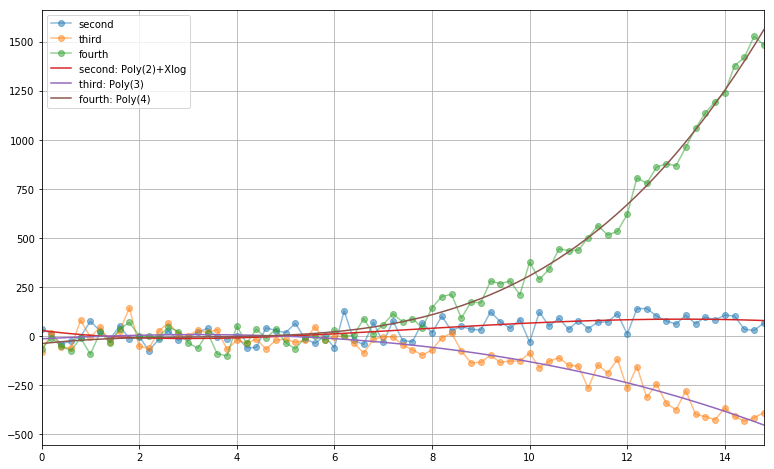

In [3]:
fig, ax = frame.plot(limit=None)

In [4]:
frame.best_fits(limit=1)

,,kind,fit,DOF
key,cost,,,
second,14.915251,Poly(2)+Xlog,(-8.0E+3 ± 3.3E+3) + (-1.18E+3 ± 4.8E+2)x + (-...,4
third,17.081440,Poly(3),(-13 ± 20) + (12 ± 12)x + (-1.5 ± 1.9)x² + (-0...,4
fourth,16.497921,Poly(4),(-38 ± 29) + (27 ± 27)x + (-7.6 ± 7.3)x² + (0....,5


In [5]:
fit = frame._fits['second'].pop()

In [6]:
fit

<CurveFit: (-8.0E+3 ± 3.3E+3) + (-1.18E+3 ± 4.8E+2)x + (-9.9 ± 4.2)x² + (3.5E+2 ± 1.4E+2)(x + 10)log(x + 10)>

In [7]:
fit.curve.curves

(<Polynomial: (-7955.163404756332) + (-1176.609049984912)x + (-9.873502314634862)x²>,
 <Xlog: (346.7482813400726)(x + 10)log(x + 10)>)